In [1]:
!cd

C:\Users\i\Desktop\2021-K-Digital-Training-main\SQL


In [2]:
#!pip install PyMySQL==1.0.0

In [1]:
import pymysql.cursors
# Connect to the database

In [4]:
# localhost or 127.0.0.0

In [2]:
connection = pymysql.connect(host='localhost',
        user='root',
        password='8475',
        db='tip',
        charset='utf8',
        cursorclass=pymysql.cursors.DictCursor)

In [6]:
'''
try:
    with connection.cursor() as cursor:
        # Read a single record
        #sql = "SELECT `id`, `password` FROM `users` WHERE `email`=%s"
        sql = "SELECT * FROM tips where tips.day='';"
        #sql = "SELECT count(total_bill) FROM tip.tips where tip >= 7 ;"
        cursor.execute(sql)
        result = cursor.fetchall()
        print(result)
finally:
    connection.close()
'''

'\ntry:\n    with connection.cursor() as cursor:\n        # Read a single record\n        #sql = "SELECT `id`, `password` FROM `users` WHERE `email`=%s"\n        sql = "SELECT * FROM tips where tips.day=\'\';"\n        #sql = "SELECT count(total_bill) FROM tip.tips where tip >= 7 ;"\n        cursor.execute(sql)\n        result = cursor.fetchall()\n        print(result)\nfinally:\n    connection.close()\n'

In [7]:
!cd

C:\Users\i\Desktop\2021-K-Digital-Training-main\SQL


In [3]:
import pymysql.cursors
import pandas as pd

In [4]:
# MySQL DB에서 데이터 받아와서 DataFrame에 저장

conn = pymysql.connect(host='localhost', user='root', 
                       password='8475', db='tip', charset='utf8',
                       autocommit=True, cursorclass=pymysql.cursors.DictCursor)
try:

    with conn.cursor() as curs:
      sql = "SELECT * FROM tips;"
      curs.execute(sql)
      rs = curs.fetchall()

      # DB에서 받아온 값을 DataFrame에 넣음

      df = pd.DataFrame(rs)
      print(df)
      #df.to_csv('query.csv')

finally:

   conn.close()

     total_bill   tip     sex smoker  day    time  size
0         16.99  1.01  Female     No  Sun  Dinner   2.0
1         10.34  1.66    Male     No  Sun  Dinner   3.0
2         21.01  3.50    Male     No  Sun  Dinner   3.0
3         23.68  3.31    Male     No  Sun  Dinner   2.0
4         24.59  3.61  Female     No  Sun  Dinner   4.0
..          ...   ...     ...    ...  ...     ...   ...
247       20.65  3.35    Male     No       Dinner   4.0
248       20.65  3.35    Male     No       Dinner   5.0
249       10.34  1.66    None     No  Sun  Dinner   3.0
250       10.34  1.66    None     No  Sun  Dinner   NaN
251       16.99  1.01  Female     No  Sun    None   2.0

[252 rows x 7 columns]


In [10]:
'''
connection = pymysql.connect(host='localhost',
        user='root',
        password='8475',
        db='tip',
        charset='utf8',
        cursorclass=pymysql.cursors.DictCursor)
try:
    with connection.cursor() as cursor:
        # Read a single record
        #sql = "SELECT `id`, `password` FROM `users` WHERE `email`=%s"
        sql = "INSERT INTO tips (total_bill, tip, sex, smoker, day, time, size) \
            VALUES ('16.99', '1.01', 'Female', 'No', 'null', 'Dinner', '2');"
        cursor.execute(sql)
        connection.commit()

finally:
    connection.close()
'''

'\nconnection = pymysql.connect(host=\'localhost\',\n        user=\'root\',\n        password=\'8475\',\n        db=\'tip\',\n        charset=\'utf8\',\n        cursorclass=pymysql.cursors.DictCursor)\ntry:\n    with connection.cursor() as cursor:\n        # Read a single record\n        #sql = "SELECT `id`, `password` FROM `users` WHERE `email`=%s"\n        sql = "INSERT INTO tips (total_bill, tip, sex, smoker, day, time, size)             VALUES (\'16.99\', \'1.01\', \'Female\', \'No\', \'null\', \'Dinner\', \'2\');"\n        cursor.execute(sql)\n        connection.commit()\n\nfinally:\n    connection.close()\n'

In [5]:
df.isnull().sum()

total_bill    0
tip           0
sex           2
smoker        0
day           0
time          1
size          1
dtype: int64

In [6]:
df['sex'].replace({'Female':0, 'Male':1}, inplace=True)

In [7]:
df["smoker"].replace({"No" : 0, "Yes" : 1}, inplace=True)
df["day"].replace({"Thur" : 0, "Fri" : 1, "Sat" : 2, "Sun" : 3}, inplace=True)
df["time"].replace({"Lunch" : 0, "Dinner" : 1}, inplace=True)

In [8]:
import numpy as np

In [9]:
df.replace('',np.nan,inplace=True) # '' -> np.nan

In [14]:
#df = df.drop('day', axis =1)

In [10]:
df.isnull().sum()

total_bill    0
tip           0
sex           2
smoker        0
day           3
time          1
size          1
dtype: int64

In [11]:
df.describe()

,total_bill,tip,sex,smoker,day,time,size
count,252.000000,252.000000,250.000000,252.000000,249.000000,251.000000,251.000000
mean,19.702500,2.977460,0.644000,0.369048,1.746988,0.729084,2.589641
std,8.803699,1.378674,0.479776,0.483507,1.155388,0.445321,0.960694
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,17.795000,2.900000,1.000000,0.000000,2.000000,1.000000,2.000000
75%,24.022500,3.502500,1.000000,1.000000,3.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000


In [17]:
type(df)

pandas.core.frame.DataFrame

In [18]:
#df=pd.read_csv('tips.csv')

In [19]:
#import pandas as pd

In [12]:
#import numpy as np
from sklearn.impute import SimpleImputer

In [13]:
data = df.values

In [20]:
y=df['total_bill']

In [21]:
X=df.drop('total_bill',axis=1)

In [22]:
X.describe()

,tip,sex,smoker,day,time,size
count,252.000000,250.000000,252.000000,249.000000,251.000000,251.000000
mean,2.977460,0.644000,0.369048,1.746988,0.729084,2.589641
std,1.378674,0.479776,0.483507,1.155388,0.445321,0.960694
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,2.900000,1.000000,0.000000,2.000000,1.000000,2.000000
75%,3.502500,1.000000,1.000000,3.000000,1.000000,3.000000
max,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000


In [23]:
y.describe()

count    252.000000
mean      19.702500
std        8.803699
min        3.070000
25%       13.347500
50%       17.795000
75%       24.022500
max       50.810000
Name: total_bill, dtype: float64

In [14]:
#df.describe()

In [15]:
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  252 non-null    float64
 1   tip         252 non-null    float64
 2   sex         250 non-null    float64
 3   smoker      252 non-null    int64  
 4   day         249 non-null    float64
 5   time        251 non-null    float64
 6   size        251 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 13.9 KB


In [24]:
data=X.values

In [25]:
y=y.values

In [24]:
data[:,5]

array([ 2.,  3.,  3.,  2.,  4.,  4.,  2.,  4.,  2.,  2.,  2.,  4.,  2.,
        4.,  2.,  2.,  3.,  3.,  3.,  3.,  2.,  2.,  2.,  4.,  2.,  4.,
        2.,  2.,  2.,  2.,  2.,  4.,  2.,  4.,  2.,  3.,  3.,  3.,  3.,
        3.,  3.,  2.,  2.,  2.,  4.,  2.,  2.,  4.,  3.,  2.,  2.,  2.,
        4.,  2.,  4.,  2.,  4.,  2.,  2.,  4.,  2.,  2.,  2.,  4.,  3.,
        3.,  2.,  1.,  2.,  2.,  2.,  3.,  2.,  2.,  2.,  2.,  2.,  4.,
        2.,  2.,  2.,  2.,  1.,  2.,  2.,  4.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  4.,  2.,  2.,  2.,  2.,  2.,  2.,  3.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  3.,  2.,  3.,  2.,  4.,
        2.,  2.,  4.,  2.,  2.,  2.,  2.,  2.,  6.,  2.,  2.,  2.,  3.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  6.,  5.,
        6.,  2.,  2.,  3.,  2.,  2.,  2.,  2.,  2.,  3.,  4.,  4.,  5.,
        6.,  4.,  2.,  4.,  4.,  2.,  3.,  2.,  2.,  3.,  2.,  4.,  2.,
        2.,  3.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  4

In [26]:
sum(np.isnan(data).flatten())

7

In [27]:
sum(np.isnan(y).flatten())

0

In [28]:
imputer = SimpleImputer(strategy='median')

In [29]:
imputer.fit(data)

SimpleImputer(strategy='median')

In [30]:
# transform the dataset
data_trans = imputer.transform(data)

In [31]:
#data_trans[:,5]

In [33]:
from sklearn.feature_selection import RFE

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
from sklearn.svm import SVR

In [51]:
estimator = SVR(kernel="linear")

In [52]:
# define RFE
rfe = RFE(estimator, n_features_to_select=4)

In [59]:
# fit RFE
selector=rfe.fit(data_trans, y)

In [61]:
selector.support_

array([ True, False,  True, False,  True,  True])

In [62]:
# summarize all features
for i in range(data_trans.shape[1]):
  print('Column: %d,  Rank: %d' % (i,  rfe.ranking_[i]))

Column: 0,  Rank: 1
Column: 1,  Rank: 3
Column: 2,  Rank: 1
Column: 3,  Rank: 2
Column: 4,  Rank: 1
Column: 5,  Rank: 1


In [63]:
df1=pd.DataFrame(data_trans)

In [64]:
df1

,0,1,2,3,4,5
0,1.01,0.0,0.0,3.0,1.0,2.0
1,1.66,1.0,0.0,3.0,1.0,3.0
2,3.50,1.0,0.0,3.0,1.0,3.0
3,3.31,1.0,0.0,3.0,1.0,2.0
4,3.61,0.0,0.0,3.0,1.0,4.0
...,...,...,...,...,...,...
247,3.35,1.0,0.0,2.0,1.0,4.0
248,3.35,1.0,0.0,2.0,1.0,5.0
249,1.66,1.0,0.0,3.0,1.0,3.0
250,1.66,1.0,0.0,3.0,1.0,2.0


In [68]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [ ]:
# the end

In [27]:
df_trans

,0,1,2,3,4,5,6
0,16.99,1.01,0.0,0.0,3.0,1.0,2.0
1,10.34,1.66,1.0,0.0,3.0,1.0,3.0
2,21.01,3.50,1.0,0.0,3.0,1.0,3.0
3,23.68,3.31,1.0,0.0,3.0,1.0,2.0
4,24.59,3.61,0.0,0.0,3.0,1.0,4.0
...,...,...,...,...,...,...,...
247,20.65,3.35,1.0,0.0,2.0,1.0,4.0
248,20.65,3.35,1.0,0.0,2.0,1.0,5.0
249,10.34,1.66,1.0,0.0,3.0,1.0,3.0
250,10.34,1.66,1.0,0.0,3.0,1.0,2.0


In [4]:
# the end

In [4]:
df. total_bill

0    39.42
1    50.81
2    48.33
Name: total_bill, dtype: float64

In [5]:
df['total_bill']

0    39.42
1    50.81
2    48.33
Name: total_bill, dtype: float64

<AxesSubplot:>

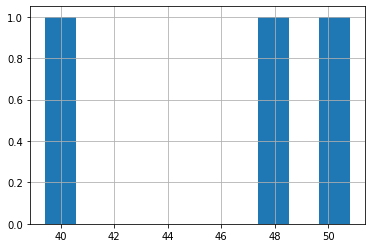

In [6]:
df['total_bill'].hist()

In [ ]:
# 새출발

In [1]:
import pymysql.cursors
import pandas as pd

In [11]:
sql="select customers.state, \
customers.customerName, payments.checkNumber \
from customers \
LEFT JOIN payments on customers.customerNumber = payments.customerNumber where payments.paymentDate >= '2004-10-06';"

In [6]:
conn = pymysql.connect(host='localhost', user='root', 
                       password='8475', db='classicmodels', charset='utf8',
                       autocommit=True, cursorclass=pymysql.cursors.DictCursor)
try:

   with conn.cursor() as curs:
      #sql = "SELECT total_bill FROM tip.tips where tip >= 7 ;"
      curs.execute(sql)
      rs = curs.fetchall()

      # DB에서 받아온 값을 DataFrame에 넣음

      df = pd.DataFrame(rs)
      print(df)

finally:

   conn.close()

       state                  customerName checkNumber
0       None             Atelier graphique    HQ336336
1       None             Atelier graphique    OM314933
2         NV            Signal Gift Stores    BO864823
3   Victoria    Australian Collectors, Co.    MA765515
4       None             La Rochelle Gifts    DB933704
..       ...                           ...         ...
84        MA              FunGiftIdeas.com    PE176846
85      None    Iberia Gift Imports, Corp.    GK294076
86        PA  Motor Mint Distributors Inc.     HS86661
87      None             Kelly's Gift Shop    EU531600
88      None             Kelly's Gift Shop     MN89921

[89 rows x 3 columns]


In [7]:
!cd

C:\Users\i\Desktop\2021-K-Digital-Training-main\SQL


In [8]:
df.to_csv('query_car.csv')